5. **Numerical integration of the HH model of the squid axon** 

**Point-1: we are using existing hodgkin_huxley(HH) module to study dynamics of HH model**
Book chapters
**Point-2: a step current is given to the HH model with default parameters, we observed that membrane potential, activation and inactivation states varies**

See Chapter 2 Section 2 on general information about the Hodgkin-Huxley equations and models.

Python classes

The hodgkin_huxley.HH module contains all code required for this exercise. It implements a Hodgkin-Huxley neuron model. At the beginning of your exercise solutions, import the modules and run the demo function.

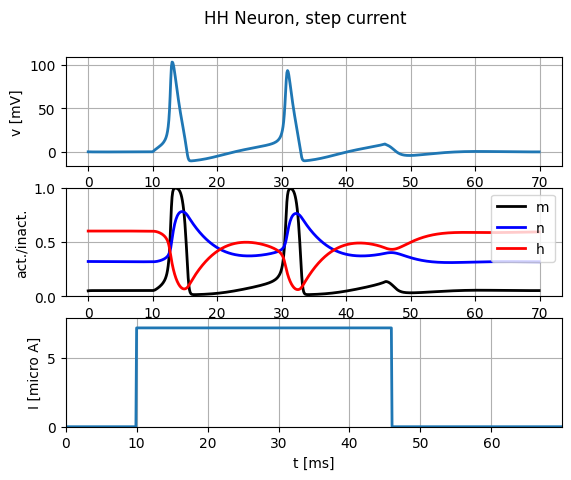

In [10]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

HH.getting_started()

**The gating variables m, n and h describe the opening and closing of ion channels in the Hodgkin-Huxley model of the neuron.**

**m represents the activation gate for the sodium channel, which is responsible for the depolarizing (rising) phase of an action potential. When m is high, the sodium channel is open, and sodium ions can flow into the cell.**

**n represents the activation gate for the potassium channel, which is responsible for the repolarizing (falling) phase of an action potential. When n is high, the potassium channel is open, and potassium ions can flow out of the cell.**

**h represents the inactivation gate for the sodium channel. It acts to "close" the channel after it has been open for a certain amount of time, preventing further sodium influx. When h is high, the sodium channel is inactive, and sodium ions cannot flow into the cell.**

5.1. Exercise: step current response
**Point-3: We study the response of a Hodgkin-Huxley neuron to different input currents, we observed that the in the minimal current,the flow of ions is less and most of the time it is in inactive states and in slow and fast ramp current it is different as compare to minimal current response**. 

Have a look at the documentation of the functions HH.simulate_HH_neuron() and HH.plot_data() and the module neurodynex3.tools.input_factory.

5.1.1. Question
What is the lowest step current amplitude Imin
 for generating at least one spike? Determine the value by trying different input amplitudes in the code fragment:

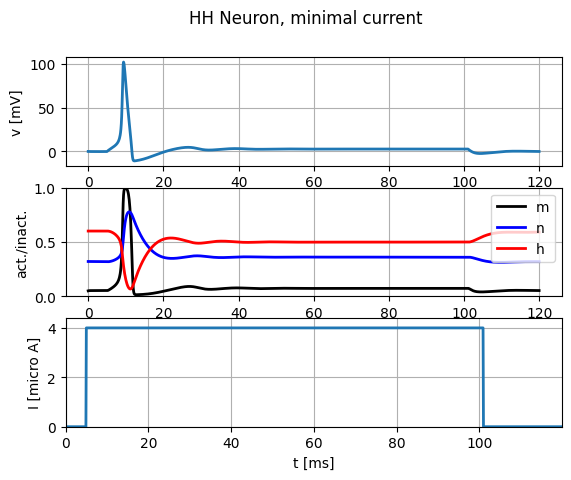

In [11]:
I_min=4
current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

5.1.2. Question
What is the lowest step current amplitude to generate repetitive firing?
Discuss the difference between the two regimes.
5.2. Exercise: **slow and fast ramp current**
The minimal current to elicit a spike does not just depend on the amplitude I
 or on the total charge Q
 of the current, but on the “shape” of the current. Let’s see why:



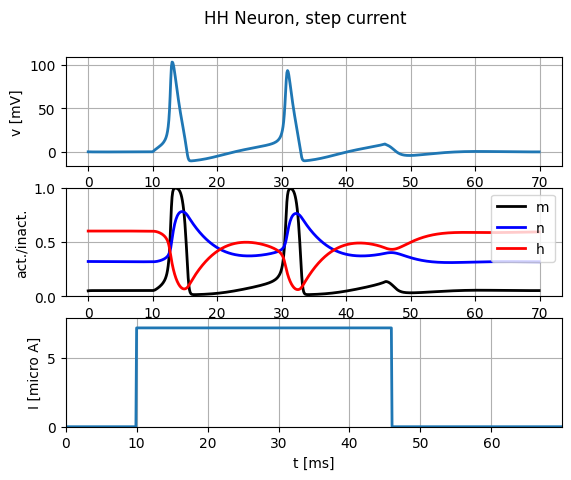

AssertionError: t_start_ms must be of type int

In [12]:
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import plot_tools, input_factory

# Parameters
current_amp = 1.0 * b2.uA  # Start with a reasonable initial current amplitude

# Setup and run the Hodgkin-Huxley model
HH.getting_started()

# Define the step current input
step_current = input_factory.get_step_current(
    t_start=5 * b2.ms,  # Ensure time is in units of ms
    t_end=100 * b2.ms,  # Ensure time is in units of ms
    unit_time=b2.ms,
    amplitude=current_amp  # Vary this amplitude to find the threshold
)

# Simulate the Hodgkin-Huxley neuron
state_monitor, spike_monitor = HH.simulate_HH_neuron(
    input_current=step_current, simulation_time=200 * b2.ms
)

# Plot membrane potential and current traces
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="HH Neuron Response")

plt.show()


5.2.1. Question
**Inject a slow ramp current into a HH neuron**. The current has amplitude 0A at t in [0, 5] ms and linearly increases to an amplitude of 12.0uAmp at t=ramp_t_end. At t>ramp_t_end, the current is set to 0A. Using the following code, reduce slow_ramp_t_end to the maximal duration of the ramp current, such that the neuron does not spike. Make sure you simulate system for at least 20ms after the current stops.

What is the membrane voltage at the time when the current injection stops (t=slow_ramp_t_end)?

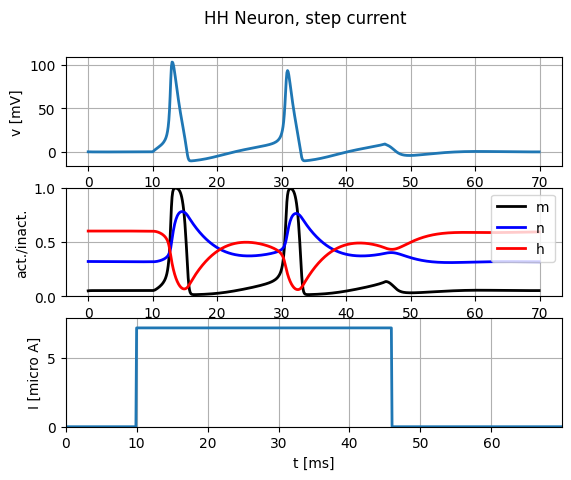

AssertionError: t_end must be of type int

In [10]:
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory, plot_tools

# Parameters
slow_ramp_t_end = 50.0 * b2.ms  # Adjust this to find the maximum duration without spiking
ramp_duration = slow_ramp_t_end / b2.ms  # Convert to ms for plotting

# Define the slow ramp current input
def slow_ramp_current(t):
    if 0 <= t <= slow_ramp_t_end:
        return t * (12.0 * b2.uAmp / slow_ramp_t_end)
    else:
        return 0 * b2.uAmp

# Setup simulation
HH.getting_started()

# Create the current input
current = input_factory.get_step_current(
    t_start=0, t_end=slow_ramp_t_end + 20.0 * b2.ms, unit_time=b2.ms, amplitude=slow_ramp_current
)

# Simulate the HH neuron
state_monitor, spike_monitor = HH.simulate_HH_neuron(input_current=current, simulation_time=slow_ramp_t_end + 20.0 * b2.ms)

# Plot membrane potential and current traces
plt.figure(figsize=(10, 6))

# Plot voltage trace
plt.subplot(211)
plt.title('HH Neuron Response to Slow Ramp Current')
plt.ylabel('Membrane Voltage (V)')
plt.plot(state_monitor.t / b2.ms, state_monitor.V[0] / b2.mV)
plt.axvline(x=ramp_duration, color='red', linestyle='--', label='End of Ramp Current')
plt.legend()

# Plot current input
plt.subplot(212)
plt.ylabel('Current (A)')
plt.xlabel('Time (ms)')
plt.plot(current.times / b2.ms, current.values / b2.uAmp, color='blue')
plt.axvline(x=ramp_duration, color='red', linestyle='--', label='End of Ramp Current')
plt.legend()

plt.tight_layout()
plt.show()

# Find membrane voltage at slow_ramp_t_end
idx_end = int(slow_ramp_t_end / state_monitor.dt)
membrane_voltage_at_end = state_monitor.V[0, idx_end] / b2.mV
print(f"Membrane voltage at t = slow_ramp_t_end ({slow_ramp_t_end}): {membrane_voltage_at_end} mV")


In [11]:
b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 60  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))

voltage_slow=6.48049806 mV


5.2.2. Question
Do the same as before but for a fast ramp current: The maximal amplitude at t=ramp_t_end is 4.5uAmp. Start with fast_ramp_t_end = 8ms and then increase it until you observe a spike. Note: Technically the input current is implemented using a TimedArray. For a short, steep ramp, the one millisecond discretization for the current is not high enough. You can create a finer resolution by setting the parameter unit_time in the function input_factory.get_ramp_current() (see next code block).

What is the membrane voltage at the time when the current injection stops (t=fast_ramp_t_end)?

In [12]:
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 80  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))

voltage_fast=4.93704929 mV


5.2.3. Question
Use the function HH.plot_data() to visualize the dynamics of the system for the fast and the slow case above. Discuss the differences between the two situations. Why are the two “threshold” voltages different? Link your observation to the gating variables m
, n
, and h
. Hint: have a look at Chapter 2 Figure 2.3.

5.3. Exercise: Rebound Spike
A HH neuron can spike not only if it receives a sufficiently strong depolarizing input current but also after a hyperpolarizing current. Such a spike is called a rebound spike.

5.3.1. Question
Inject a hyperpolarizing step current I_amp = -1 uA for 20ms into the HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and the gating variables. Repeat the simulation with I_amp = -5 uA What is happening here? To which gating variable do you attribute this rebound spike?


5.4. Exercise: Brian implementation of a HH neuron
In this exercise you will learn to work with the Brian2 model equations. To do so, get the source code of the function HH.simulate_HH_neuron() (follow the link to the documentation and then click on the [source] link). Copy the function code and paste it into your Jupyter Notebook. Change the function name from simulate_HH_neuron to a name of your choice. Have a look at the source code and find the conductance parameters gK and gNa.

5.4.1. Question
In the source code of your function, change the density of sodium channels. Increase it by a factor of 1.4. Stimulate this modified neuron with a step current.

What is the minimal current leading to repetitive spiking? Explain.
Run a simulation with no input current to determine the resting potential of the neuron. Link your observation to the Goldman–Hodgkin–Katz voltage equation.
If you increase the sodium conductance further, you can observe repetitive firing even in the absence of input, why?
